# **UAS PENAMBANGAN DATA : Prediksi Mahasiswa Berisiko Tinggi Drop Out (DO)**

KELOMPOK 1

NAMA ANGGOTA
1. WAHYU OZORAH MANURUNG
2. DAMIANUS CHRISTOPHER SAMOSIR
3. TORANG FOUR YONES MANULLANG

SEMI-SUPERVISED

## LATAR BELAKANG

Dalam dunia pendidikan tinggi, permasalahan mahasiswa yang mengalami drop out (DO) menjadi perhatian serius bagi institusi akademik. Drop out tidak hanya mencerminkan kegagalan individu dalam menyelesaikan studi, tetapi juga menunjukkan potensi kerugian bagi institusi dari sisi reputasi, efisiensi anggaran, serta kualitas lulusan. Oleh karena itu, penting bagi institusi untuk memiliki sistem prediksi yang mampu mengidentifikasi mahasiswa berisiko tinggi sebelum mereka benar-benar keluar dari sistem pendidikan. Prediksi yang akurat memungkinkan pihak kampus untuk memberikan intervensi tepat waktu melalui program bimbingan, konseling, atau bantuan finansial (Bowers & Sprott, 2012).

Dalam penelitian ini, pendekatan semi-supervised learning digunakan sebagai solusi terhadap keterbatasan label (ground truth) DO pada data historis mahasiswa. Strategi ini dimulai dengan proses clustering menggunakan K-Means, di mana mahasiswa dikelompokkan berdasarkan fitur-fitur seperti IPK, kehadiran, dan faktor akademik lainnya untuk membedakan antara kelompok yang berisiko tinggi dan rendah. Hasil dari proses clustering ini kemudian digunakan sebagai label pseudo (pseudo-label) yang selanjutnya menjadi dasar pelatihan model klasifikasi. Dengan demikian, proses klasifikasi menggunakan Logistic Regression dapat dilakukan untuk memprediksi status risiko DO mahasiswa baru atau mahasiswa aktif lainnya yang belum diklasifikasikan (Chapelle et al., 2006).

Pemanfaatan kombinasi K-Means dan Logistic Regression ini memberikan fleksibilitas dalam membangun sistem prediksi meskipun dengan data label yang terbatas. K-Means sebagai teknik unsupervised membantu menemukan struktur alami dalam data, sedangkan Logistic Regression memberikan interpretasi yang jelas dan akurat terhadap peluang seorang mahasiswa masuk dalam kategori berisiko tinggi. Implementasi pendekatan ini sejalan dengan prinsip Educational Data Mining (EDM) yang bertujuan mendukung pengambilan keputusan berbasis data untuk meningkatkan kualitas dan efisiensi proses pendidikan (Baker & Siemens, 2014). Dengan sistem ini, institusi diharapkan dapat mengurangi angka DO secara signifikan melalui strategi preventif berbasis data.

Referensi:

Bowers, A. J., & Sprott, R. (2012). Why tenth graders fail to finish high school: Dropout predictors in a full-year cohort. Journal of Education for Students Placed at Risk (JESPAR), 17(3), 129-148.

Chapelle, O., Scholkopf, B., & Zien, A. (2006). Semi-Supervised Learning. MIT Press.

Baker, R. S. J. d., & Siemens, G. (2014). Educational Data Mining and Learning Analytics. In Cambridge Handbook of the Learning Sciences.

## Business Understanding

Masalah drop out (DO) mahasiswa merupakan tantangan serius dalam dunia pendidikan tinggi karena berdampak pada reputasi institusi, alokasi sumber daya, dan kualitas lulusan. Untuk menurunkan angka DO, institusi pendidikan perlu memahami pola-pola yang mengarah pada risiko mahasiswa keluar dari sistem akademik. Pemanfaatan pendekatan data-driven seperti data mining dan machine learning menjadi kunci dalam merancang sistem prediksi yang efektif, terutama ketika data label historis tidak tersedia secara lengkap. Dengan pendekatan semi-supervised learning, proses prediksi risiko DO dapat dibangun secara bertahap, dimulai dengan pengelompokan data tanpa label hingga menghasilkan model prediktif yang akurat.

### Problem Statements
- Bagaimana mengidentifikasi mahasiswa yang berisiko tinggi DO ketika data historis tidak sepenuhnya memiliki label risiko?

- Bagaimana memanfaatkan teknik unsupervised learning untuk membentuk kelompok mahasiswa berdasarkan karakteristik akademik mereka?

- Bagaimana mengembangkan model klasifikasi yang mampu memprediksi risiko DO berdasarkan hasil clustering awal tersebut?

### Goals
- Mengelompokkan mahasiswa menjadi dua kategori utama: risiko tinggi dan risiko rendah DO menggunakan metode K-Means berdasarkan fitur-fitur akademik seperti IPK, kehadiran, dan lain-lain.

- Menggunakan hasil clustering sebagai pseudo-label untuk membangun model klasifikasi prediktif menggunakan Logistic Regression.

- Mengembangkan pipeline prediksi risiko DO berbasis data yang dapat digunakan oleh institusi pendidikan untuk melakukan intervensi dini.

### Solution Statements
- Clustering Mahasiswa dengan K-Means
Menggunakan K-Means clustering untuk membagi mahasiswa ke dalam dua kelompok berdasarkan variabel akademik yang relevan. Cluster yang menunjukkan karakteristik negatif seperti IPK rendah dan kehadiran buruk ditetapkan sebagai kelompok risiko tinggi.

- Klasifikasi Risiko dengan Logistic Regression
Hasil dari proses clustering digunakan sebagai pseudo-label yang kemudian digunakan untuk melatih model Logistic Regression agar mampu memprediksi risiko DO pada mahasiswa baru atau data lain yang belum diklasifikasikan.

- Penerapan Semi-Supervised Learning
Mengintegrasikan metode unsupervised (K-Means) dan supervised (Logistic Regression) dalam pendekatan semi-supervised learning untuk mengatasi keterbatasan data berlabel dan tetap menghasilkan model prediksi yang efektif dan dapat dijelaskan (interpretable).



In [ ]:
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih kompleks
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan data uji
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler  # Untuk normalisasi data dan encoding kategori
from imblearn.over_sampling import SMOTE # Menggunakan SMOTE untuk menangani ketidakseimbangan kelas
from sklearn.ensemble import RandomForestClassifier  # Untuk model Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score  # Untuk mengevaluasi model
from sklearn.cluster import KMeans, FeatureAgglomeration # Import KMeans and FeatureAgglomeration for clustering
from sklearn.feature_selection import SelectKBest, mutual_info_classif # Import SelectKBest and mutual_info_classif for feature selection
from sklearn.decomposition import PCA # Import PCA for dimensionality reduction

Mengimpor pustaka (library) yang dibutuhkan:

pandas: Untuk manipulasi dan analisis data.

*   numpy: Untuk perhitungan numerik, khususnya array dan operasi matematika.
*   matplotlib.pyplot: Untuk visualisasi data (plot, grafik).
*   seaborn: Library visualisasi berbasis matplotlib yang lebih interaktif dan mudah digunakan.


## DATA UNDERSTANDING

Proyek ini menggunakan dataset sintetis yang dirancang untuk memodelkan berbagai aspek akademik, perilaku, dan kondisi sosial ekonomi mahasiswa dalam konteks risiko putus studi (drop out/DO). Dataset ini digunakan sebagai dasar untuk membangun sistem prediksi mahasiswa berisiko tinggi menggunakan pendekatan semi-supervised learning, di mana tahap awal dilakukan clustering untuk mengelompokkan mahasiswa berisiko tinggi dan rendah, dan hasil cluster digunakan sebagai label dalam proses klasifikasi lanjutan.

Dataset mencerminkan data dari lebih dari 2.500 mahasiswa dengan berbagai indikator yang bersifat multidimensi, meliputi performa akademik (IPK tiap semester), kehadiran kuliah, perilaku retake, aktivitas daring, hingga status sosial ekonomi dan pekerjaan. Data ini dirancang untuk menggambarkan kondisi nyata di lingkungan pendidikan tinggi, di mana banyak faktor saling memengaruhi terhadap risiko mahasiswa untuk drop out.

- Jumlah Data
Jumlah Baris: >2.500 entri data mahasiswa.

- Jumlah Kolom: 25 kolom fitur utama.

- Jumlah Duplikat: Ditemukan 50 baris duplikat yang perlu dihapus dalam proses data cleaning.

- Jumlah Missing Values: Hampir semua kolom memiliki 50–55 missing values, termasuk fitur-fitur penting seperti IPK, kehadiran, aktivitas online, dan status sosial ekonomi. Penanganan missing values akan menjadi langkah krusial dalam tahap data preparation.

### Variabel-variabel dalam dataset:
- ipk_smt1 – ipk_smt8
Menunjukkan IPK mahasiswa dari semester 1 hingga semester 8. Nilai ini mencerminkan performa akademik jangka panjang, dan fluktuasi nilai dapat menjadi indikator risiko DO.

- kehadiran_mk1 – kehadiran_mk6
Persentase kehadiran mahasiswa di 6 mata kuliah utama. Tingkat kehadiran yang rendah sering dikaitkan dengan keterlibatan akademik yang lemah, dan dapat menjadi sinyal peringatan dini terhadap risiko DO.

- retake
Menggambarkan jumlah mata kuliah yang harus diulang oleh mahasiswa. Fitur ini penting untuk mengidentifikasi kesulitan belajar yang berkelanjutan.

- online_activity1 – online_activity6
Indikator kuantitatif aktivitas mahasiswa di platform pembelajaran daring (LMS), seperti frekuensi login, pengumpulan tugas, interaksi di forum, dll. Aktivitas daring yang minim dapat mencerminkan disengagement terhadap proses pembelajaran.

- status_pekerjaan dan beban_kerja
Menunjukkan apakah mahasiswa bekerja dan berapa besar beban kerja mingguannya. Mahasiswa dengan tanggung jawab kerja tinggi sering mengalami tekanan waktu dan kesulitan dalam mempertahankan performa akademik.

- sosial_ekonomi
Kategori status sosial ekonomi mahasiswa (misalnya: rendah, menengah, tinggi). Faktor ekonomi memiliki pengaruh signifikan terhadap kelanjutan studi, baik secara langsung maupun tidak langsung.



## Load Dataset

In [ ]:
# Membaca file CSV
df = pd.read_csv('/content/cluster_.csv')

# Menampilkan semua kolom dan baris dari DataFrame
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.max_rows', None)     # Menampilkan semua baris
print(df)

,id,ipk_smt1,ipk_smt2,ipk_smt3,ipk_smt4,ipk_smt5,ipk_smt6,ipk_smt7,ipk_smt8,kehadiran_mk1,...,retake,online_activity1,online_activity2,online_activity3,online_activity4,online_activity5,online_activity6,status_pekerjaan,beban_kerja,sosial_ekonomi
0,1.0,3.00,2.68,3.07,3.51,2.63,2.63,3.54,3.13,80.3,...,0.0,1.6,3.9,3.0,5.6,3.2,2.2,Tidak Bekerja,NaN,Menengah
1,2.0,4.00,NaN,2.81,2.49,2.45,3.22,2.90,2.43,NaN,...,3.0,2.5,7.2,10.6,7.4,5.4,6.8,Penuh Waktu,37.0,Menengah
2,3.0,3.92,3.29,2.80,2.96,2.27,2.23,1.81,2.07,91.4,...,2.0,3.2,4.8,7.9,2.8,6.9,NaN,Tidak Bekerja,0.0,Menengah
3,4.0,5.00,3.14,2.44,2.92,2.06,2.61,2.72,3.23,100.0,...,0.0,5.3,6.2,6.4,5.7,2.1,6.8,NaN,0.0,Menengah
4,5.0,3.23,2.65,2.36,2.57,3.11,2.62,3.17,2.09,76.3,...,2.0,3.7,4.0,5.6,2.1,3.7,4.7,Tidak Bekerja,NaN,Rendah


Membaca file CSV dan menampilkan 5 baris pertama dari data. Tujuannya adalah untuk melihat struktur awal data, seperti kolom dan sebagian isinya.

## Exploratory Data Analysis (EDA)

In [ ]:
print("Informasi Data Frame:\n")
df_info = df.info()

Informasi Data Frame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2500 non-null   float64
 1   ipk_smt1          2498 non-null   float64
 2   ipk_smt2          2498 non-null   float64
 3   ipk_smt3          2500 non-null   float64
 4   ipk_smt4          2499 non-null   float64
 5   ipk_smt5          2499 non-null   float64
 6   ipk_smt6          2495 non-null   float64
 7   ipk_smt7          2499 non-null   float64
 8   ipk_smt8          2498 non-null   float64
 9   kehadiran_mk1     2499 non-null   float64
 10  kehadiran_mk2     2500 non-null   float64
 11  kehadiran_mk3     2500 non-null   float64
 12  kehadiran_mk4     2500 non-null   float64
 13  kehadiran_mk5     2499 non-null   float64
 14  kehadiran_mk6     2500 non-null   float64
 15  retake            2498 non-null   float64
 16  online_activity1  2

Menampilkan struktur data:
*   Jumlah baris (jumlah pelanggan)
*   Tipe data setiap kolom
*   Mengetahui apakah ada nilai kosong (null)

Dari sini bisa diketahui apakah dataset bersih dan bisa langsung digunakan.


In [ ]:
df_original = df.copy()

In [ ]:
# Menampilkan shape dataset (jumlah baris dan kolom)
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.\n")

Dataset memiliki 2550 baris dan 25 kolom.



In [ ]:
# Memeriksa jumlah nilai yang hilang (missing values) pada setiap kolom
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum(), "\n")

Jumlah Missing Values per Kolom:
id                  50
ipk_smt1            52
ipk_smt2            52
ipk_smt3            50
ipk_smt4            51
ipk_smt5            51
ipk_smt6            55
ipk_smt7            51
ipk_smt8            52
kehadiran_mk1       51
kehadiran_mk2       50
kehadiran_mk3       50
kehadiran_mk4       50
kehadiran_mk5       51
kehadiran_mk6       50
retake              52
online_activity1    50
online_activity2    50
online_activity3    51
online_activity4    50
online_activity5    52
online_activity6    51
status_pekerjaan    51
beban_kerja         51
sosial_ekonomi      51
dtype: int64 



In [ ]:
# Memeriksa dan menampilkan jumlah duplikasi data dalam dataset
print(f"Jumlah Data yang Duplikat: {df.duplicated().sum()}\n")

Jumlah Data yang Duplikat: 50




=== Pemeriksaan Outlier dengan IQR ===

Outlier di kolom ipk_smt1:
          id  ipk_smt1
3        4.0      5.00
308    309.0      1.43
309    310.0      1.38
471    472.0      5.00
545    546.0      1.35
621    622.0      5.00
884    885.0      5.00
909    910.0      5.00
974    975.0      5.00
996    997.0      1.18
1208  1209.0      1.44
1277  1278.0      5.00
1349  1350.0      5.00
1507  1508.0      1.44
1571  1572.0      1.29
1636  1637.0      1.25
1878  1879.0      5.00
2090  2091.0      5.00
2332  2333.0      1.11
2435  2436.0      1.04
2439  2440.0      1.41
2474  2475.0      1.08
2502   546.0      1.35

Outlier di kolom ipk_smt2:
          id  ipk_smt2
173    174.0      1.30
898    899.0      1.22
1173  1174.0      1.28
1251  1252.0      1.36
1432  1433.0      1.36
2070     NaN      1.33
2323  2324.0      0.98
2402  2403.0      1.32

Outlier di kolom ipk_smt3:
          id  ipk_smt3
803    804.0      1.34
1166  1167.0      1.10
1309  1310.0      0.66
1544  1545.0      1.29
16

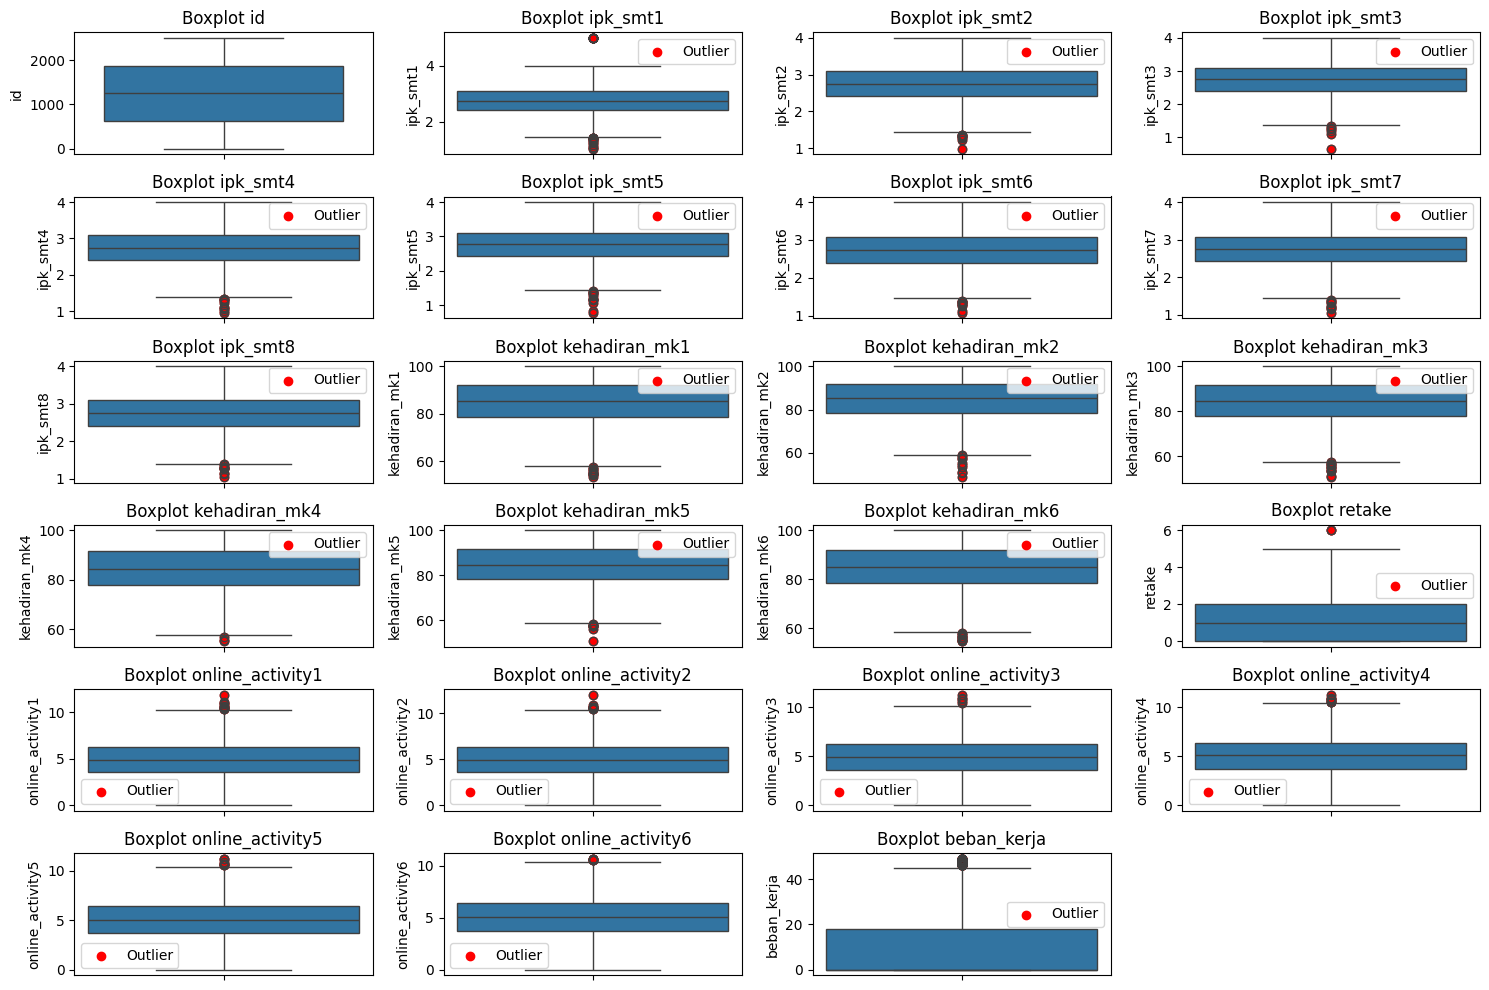

In [ ]:
# Pemeriksaan Outlier menggunakan IQR
print("\n=== Pemeriksaan Outlier dengan IQR ===")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) // 4) + 1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')

    # Menghitung batas IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menemukan outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][['id', col]]
    if not outliers.empty:
        print(f"\nOutlier di kolom {col}:")
        print(outliers)

    # Menambahkan scatter plot untuk outlier
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outlier_values.empty:
        plt.scatter(x=[0] * len(outlier_values), y=outlier_values, color='red', marker='o', label='Outlier')
        plt.legend()
plt.tight_layout()
plt.show()

Memberikan ringkasan statistik dari kolom numerik, seperti:

*   Rata-rata (mean)
*   Nilai minimum dan maksimum
*   Kuartil (25%, 50%, 75%)
Tujuannya adalah melihat sebaran data dan mendeteksi anomali awal.

## Data Preparation


### Preprocessing

In [ ]:
# Menghapus kolom 'id'
print("\n=== Menghapus Kolom ID ===")
df = df.drop(columns=['id'])
print("Kolom setelah menghapus 'id':")
print(df.columns)


=== Menghapus Kolom ID ===
Kolom setelah menghapus 'id':
Index(['ipk_smt1', 'ipk_smt2', 'ipk_smt3', 'ipk_smt4', 'ipk_smt5', 'ipk_smt6',
       'ipk_smt7', 'ipk_smt8', 'kehadiran_mk1', 'kehadiran_mk2',
       'kehadiran_mk3', 'kehadiran_mk4', 'kehadiran_mk5', 'kehadiran_mk6',
       'retake', 'online_activity1', 'online_activity2', 'online_activity3',
       'online_activity4', 'online_activity5', 'online_activity6',
       'status_pekerjaan', 'beban_kerja', 'sosial_ekonomi'],
      dtype='object')


Kode ini menunjukkan bahwa kolom id dihapus dari dataset karena kolom tersebut tidak memiliki kontribusi langsung terhadap proses analisis atau pemodelan, seperti clustering atau klasifikasi.

Kolom id umumnya hanya berfungsi sebagai identifikasi unik dan tidak mengandung informasi yang bermakna secara statistik. Dengan menghapusnya:
*   Dataset menjadi lebih bersih dan hanya terdiri dari fitur-fitur yang relevan, seperti ipk_smt, kehadiran, online_activity, dll.
*   Mengurangi risiko algoritma model salah menganggap id sebagai fitur numerik yang penting.

Tujuannya untuk mengurangi risiko algoritma model salah menganggap id sebagai fitur numerik yang penting.



In [ ]:
# 1. Encoding Kolom Kategorikal
print("\n=== Encoding Kolom Kategorikal ===")
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
print("Data setelah encoding:")
print(df[categorical_cols].head())


=== Encoding Kolom Kategorikal ===
Data setelah encoding:
   status_pekerjaan  sosial_ekonomi
0                 2               0
1                 1               0
2                 2               0
3                 3               0
4                 2               1


 Mengonversi data kategorikal agar bisa digunakan dalam model atau analisis statistik. Dengan melakukan :
1.   Dua kolom kategorikal: status_pekerjaan dan sosial_ekonomi telah diubah ke bentuk numerik menggunakan Label Encoding.
2.   Setiap kategori diubah menjadi angka (misal: 0, 1, 2, 3).

Ini penting karena sebagian besar algoritma machine learning tidak dapat bekerja langsung dengan data bertipe teks.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ipk_smt1          2498 non-null   float64
 1   ipk_smt2          2498 non-null   float64
 2   ipk_smt3          2500 non-null   float64
 3   ipk_smt4          2499 non-null   float64
 4   ipk_smt5          2499 non-null   float64
 5   ipk_smt6          2495 non-null   float64
 6   ipk_smt7          2499 non-null   float64
 7   ipk_smt8          2498 non-null   float64
 8   kehadiran_mk1     2499 non-null   float64
 9   kehadiran_mk2     2500 non-null   float64
 10  kehadiran_mk3     2500 non-null   float64
 11  kehadiran_mk4     2500 non-null   float64
 12  kehadiran_mk5     2499 non-null   float64
 13  kehadiran_mk6     2500 non-null   float64
 14  retake            2498 non-null   float64
 15  online_activity1  2500 non-null   float64
 16  online_activity2  2500 non-null   float64


In [ ]:
# Menangani Missing Value
# Kolom numerik: imputasi dengan median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Kolom kategorikal: imputasi dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values setelah penanganan:")
print(df.isnull().sum())



Missing values setelah penanganan:
ipk_smt1            0
ipk_smt2            0
ipk_smt3            0
ipk_smt4            0
ipk_smt5            0
ipk_smt6            0
ipk_smt7            0
ipk_smt8            0
kehadiran_mk1       0
kehadiran_mk2       0
kehadiran_mk3       0
kehadiran_mk4       0
kehadiran_mk5       0
kehadiran_mk6       0
retake              0
online_activity1    0
online_activity2    0
online_activity3    0
online_activity4    0
online_activity5    0
online_activity6    0
status_pekerjaan    0
beban_kerja         0
sosial_ekonomi      0
dtype: int64


Kode ini menangani missing value dengan cara:
*   Kolom numerik: isi nilai kosong dengan median supaya tidak terpengaruh outlier.
*   Kolom kategorikal: isi nilai kosong dengan modus supaya mempertahankan kategori paling umum.

Kode ini mengisi missing value sesuai tipe data agar data siap diproses lebih lanjut.



In [ ]:
print("\n=== Penanganan Duplikat ===")
df = df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")


=== Penanganan Duplikat ===
Jumlah baris setelah menghapus duplikat: 2500



=== Penanganan Outlier dengan IQR ===
Kolom ipk_smt1 memiliki 29 outlier
Kolom ipk_smt2 memiliki 8 outlier
Kolom ipk_smt3 memiliki 9 outlier
Kolom ipk_smt4 memiliki 11 outlier
Kolom ipk_smt5 memiliki 15 outlier
Kolom ipk_smt6 memiliki 10 outlier
Kolom ipk_smt7 memiliki 14 outlier
Kolom ipk_smt8 memiliki 11 outlier
Kolom kehadiran_mk1 memiliki 13 outlier
Kolom kehadiran_mk2 memiliki 11 outlier
Kolom kehadiran_mk3 memiliki 14 outlier
Kolom kehadiran_mk4 memiliki 5 outlier
Kolom kehadiran_mk5 memiliki 9 outlier
Kolom kehadiran_mk6 memiliki 12 outlier
Kolom retake memiliki 2 outlier
Kolom online_activity1 memiliki 12 outlier
Kolom online_activity2 memiliki 17 outlier
Kolom online_activity3 memiliki 5 outlier
Kolom online_activity4 memiliki 8 outlier
Kolom online_activity5 memiliki 12 outlier
Kolom online_activity6 memiliki 6 outlier
Kolom status_pekerjaan memiliki 0 outlier
Kolom beban_kerja memiliki 104 outlier
Kolom sosial_ekonomi memiliki 50 outlier

=== Boxplot setelah Penanganan Outl

<ipython-input-15-8fc2ff1f8579>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-15-8fc2ff1f8579>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-15-8fc2ff1f8579>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

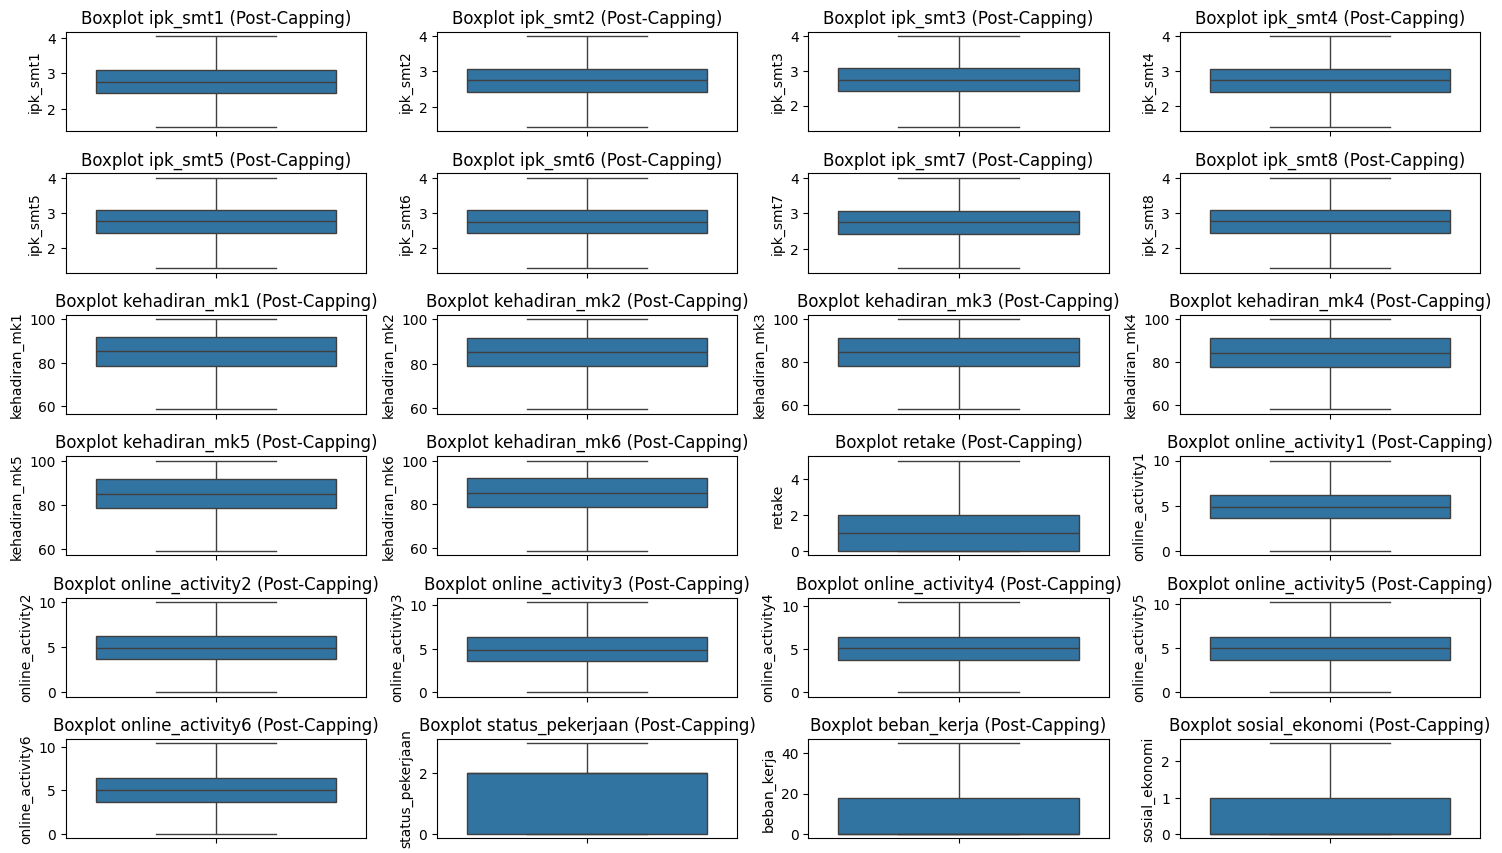

In [ ]:
# Preprocessing: Penanganan Outlier dengan IQR
print("\n=== Penanganan Outlier dengan IQR ===")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Kolom {col} memiliki {len(outliers)} outlier")
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Visualisasi boxplot setelah penanganan outlier
print("\n=== Boxplot setelah Penanganan Outlier ===")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) // 4) + 1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col} (Post-Capping)')
plt.tight_layout()
plt.show()


Dengan memakai metode IQR untuk deteksi dan atasi outlier di kolom numerik:

* Hitung Q1, Q3, dan IQR = Q3 - Q1
* Tentukan batas bawah dan atas (Q1 - 1.5IQR, Q3 + 1.5IQR)
* Identifikasi dan hitung outlier di luar batas tersebut
* Ganti nilai outlier dengan batas bawah/atas (capping) supaya data tidak terlalu ekstrem

Visualisasikan ulang dengan boxplot agar distribusi data terlihat lebih rapi dan stabil setelah penanganan. Tujuannya supaya outlier tidak mengganggu analisis atau model tapi data tetap lengkap.

## Modeling

Pendekatan Clustering (Unsupervised Learning)

Untuk mengidentifikasi kelompok mahasiswa berisiko tinggi dan rendah secara tidak langsung (tanpa label), digunakan algoritma K-Means Clustering sebagai bagian dari pendekatan semi-supervised learning. Tahapan ini bertujuan menghasilkan label pseudo (hasil klaster) yang nantinya akan digunakan dalam tahap supervised classification.

Baseline Clustering
Sebagai baseline, dilakukan clustering dengan:

- Jumlah cluster awal: 2 (diasumsikan: satu kelompok berisiko tinggi, satu rendah)

- Algoritma: KMeans, parameter default n_clusters=2, random_state=42

- Evaluasi hasil cluster dilakukan dengan Silhouette Score, yang mengukur seberapa baik objek dikelompokkan. Skor di atas 0.55 dianggap cukup baik.



In [ ]:
clustering_data = df[numeric_cols]

In [ ]:
# Pilih jumlah cluster awal (misalnya, 2)
n_clusters = 2

# Pilih kolom numerikal untuk clustering
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
clustering_data = df[numeric_cols]  # Pastikan ini benar

# Latih model clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data)  # Pindahkan setelah model dibuat

# Tambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

df.head()

,ipk_smt1,ipk_smt2,ipk_smt3,ipk_smt4,ipk_smt5,ipk_smt6,ipk_smt7,ipk_smt8,kehadiran_mk1,kehadiran_mk2,...,online_activity1,online_activity2,online_activity3,online_activity4,online_activity5,online_activity6,status_pekerjaan,beban_kerja,sosial_ekonomi,cluster
0,3.00,2.68,3.07,3.51,2.63,2.63,3.54,3.13,80.3,90.4,...,1.6,3.9,3.00,5.6,3.2,2.2,2,0.0,0.0,1
1,4.00,2.75,2.81,2.49,2.45,3.22,2.90,2.43,85.5,83.4,...,2.5,7.2,10.35,7.4,5.4,6.8,1,37.0,0.0,0
2,3.92,3.29,2.80,2.96,2.27,2.23,1.81,2.07,91.4,75.9,...,3.2,4.8,7.90,2.8,6.9,5.1,2,0.0,0.0,1
3,4.05,3.14,2.44,2.92,2.06,2.61,2.72,3.23,100.0,90.8,...,5.3,6.2,6.40,5.7,2.1,6.8,3,0.0,0.0,1
4,3.23,2.65,2.36,2.57,3.11,2.62,3.17,2.09,76.3,79.9,...,3.7,4.0,5.60,2.1,3.7,4.7,2,0.0,1.0,1


Penggunaan metode K-Means clustering terhadap data mahasiswa yang mencakup IPK semester 1–8, kehadiran mata kuliah, dan aktivitas online, mahasiswa berhasil dikelompokkan ke dalam dua klaster utama. Pemilihan fitur numerik memungkinkan model mendeteksi pola perilaku akademik dan partisipasi digital secara menyeluruh.Hasil clustering ini memberikan gambaran mahasiswa

Jumlah klaster: 2, Silhouette Score: 0.28993083470979447 - Tidak Disimpan
Jumlah klaster: 3, Silhouette Score: 0.11652412473530656 - Tidak Disimpan
Jumlah klaster: 4, Silhouette Score: 0.12750259470710457 - Tidak Disimpan
Jumlah klaster: 5, Silhouette Score: 0.09600038360796441 - Tidak Disimpan
Jumlah klaster: 6, Silhouette Score: 0.09881976160804122 - Tidak Disimpan
Jumlah klaster: 7, Silhouette Score: 0.09803087090179112 - Tidak Disimpan
Jumlah klaster: 8, Silhouette Score: 0.09782951462573423 - Tidak Disimpan
Jumlah klaster: 9, Silhouette Score: 0.09294225799053826 - Tidak Disimpan
Jumlah klaster: 10, Silhouette Score: 0.09273974982113661 - Tidak Disimpan


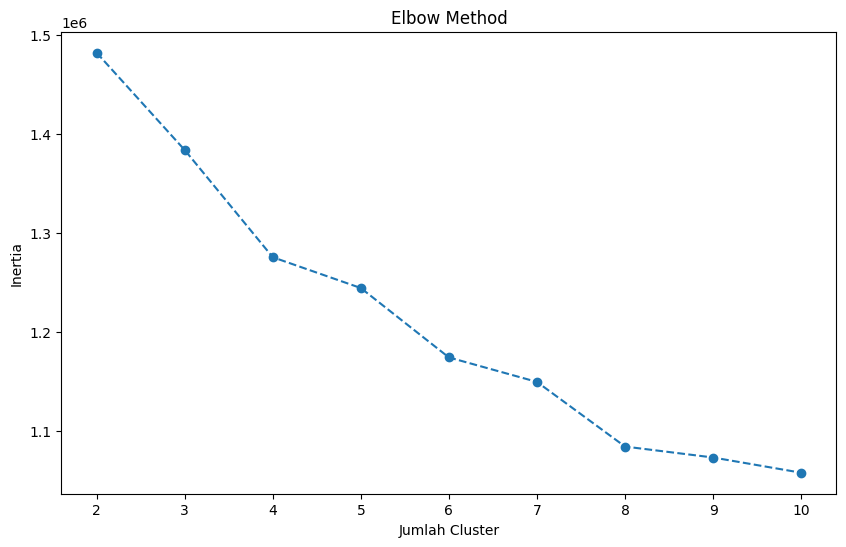

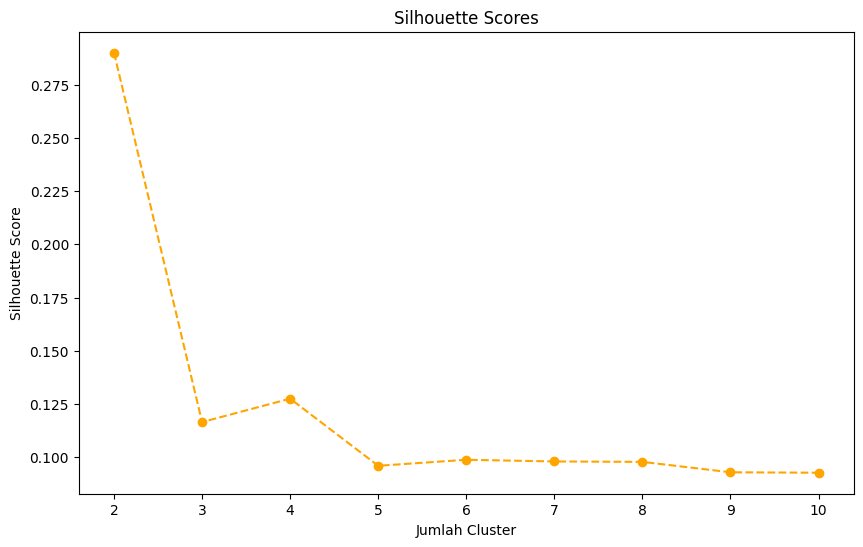


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [ ]:
# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Uji jumlah cluster dari 2 hingga 10

# Variabel untuk menyimpan label klaster yang valid
valid_cluster_labels = []

for n_clusters in range_n_clusters:
    # Melakukan klasterisasi KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data)

    # Menghitung Silhouette Score untuk hasil klasterisasi
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)

    # Simpan inertia (SSE) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Hitung silhouette score
    score = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(score)

    # Jika Silhouette Score >= 0.55, simpan label klaster
    if silhouette_avg >= 0.55:
        valid_cluster_labels.append(cluster_labels)
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Disimpan")
    else:
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Tidak Disimpan")

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

# Pilih jumlah cluster optimal berdasarkan evaluasi
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range dimulai dari 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_n_clusters}")

Dalam proses clustering, pemilihan jumlah klaster yang optimal sangat penting agar pengelompokan data benar-benar merepresentasikan pola alami di dalamnya. Dua metode yang digunakan dalam analisis ini adalah:
1. Elbow Method
Metode ini sedikit lebih ambigu, tetapi jika mempertimbangkan kesederhanaan model dan hasil Silhouette, klaster = 2 tetap merupakan pilihan yang rasional dan efisien.
2. Silhouette Score
Nilai tertinggi hanya dicapai pada jumlah klaster = 2, menunjukkan bahwa data secara alami lebih baik dipisahkan ke dalam 2 klaster saja. Ini menguatkan hasil clustering sebelumnya.

Berdasarkan Silhouette Score tertinggi dan pertimbangan dari Elbow Method, jumlah klaster yang optimal untuk memodelkan data mahasiswa ini adalah 2 klaster.

Artinya, mahasiswa secara alami terbagi ke dalam dua kelompok besar berdasarkan IPK, kehadiran, dan aktivitas online. Ini mendukung hasil analisis sebelumnya dan memberikan landasan kuat untuk intervensi atau segmentasi yang lebih tepat sasaran.



In [ ]:
# Menghitung silhoutte score
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

Silhouette Score Tanpa Feature Selection: 0.28993083470979447


Silhouette Score digunakan untuk mengevaluasi kualitas klastering. silhouette_score_original menunjukkan performa klastering awal saat semua fitur masih digunakan.

Ini menjadi baseline untuk dibandingkan dengan hasil setelah dilakukan feature selection.Jika skor meningkat setelah feature selection, berarti fitur yang dihapus memang kurang relevan atau justru mengganggu.

## **Feature Selection (Opsional)**

Improvement: Feature Selection & Dimensionality Reduction
Untuk meningkatkan kualitas clustering, dilakukan eksperimen dengan pipeline sebagai berikut:

a. Feature Agglomeration
Reduksi fitur dengan cara mengelompokkan fitur mirip menggunakan hierarchical clustering. Dicoba n_clusters dari 2 hingga 8.

b. SelectKBest
Pemilihan fitur terbaik dari hasil Feature Agglomeration, berdasarkan hubungan dengan dummy label KMeans awal (menggunakan mutual_info_classif). Dicoba nilai k = 2 hingga 4.

c. Principal Component Analysis (PCA)
Reduksi dimensi ke 1 atau 2 komponen utama, untuk menyederhanakan data dan memudahkan visualisasi.

Setiap kombinasi diuji dengan KMeans dan dinilai berdasarkan Silhouette Score.



In [ ]:
# 1. Skala Data
scaler = RobustScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# 2. Optimasi Parameter untuk Feature Agglomeration, SelectKBest, dan PCA
best_silhouette = -1
best_agglo_n = None
best_k = None
best_n_components = None

# Eksperimen dengan berbagai kombinasi parameter
for agglo_n in range(2, min(9, clustering_data_scaled.shape[1] + 1)):  # Menguji n_clusters dari 2 hingga 8 atau maks fitur
    # Feature Agglomeration
    agglo = FeatureAgglomeration(n_clusters=agglo_n)
    clustering_data_agglo = agglo.fit_transform(clustering_data_scaled)

    dummy_target = KMeans(n_clusters=2, random_state=42).fit_predict(clustering_data_agglo)

    # SelectKBest
    for k in range(2, min(5, clustering_data_agglo.shape[1] + 1)):  # Uji k dari 2 hingga 4 atau maks fitur
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
        clustering_data_selected = selector.fit_transform(clustering_data_agglo, dummy_target)

        # PCA
        for n_comp in [1, 2]:  # Uji n_components=1 atau 2
            if clustering_data_selected.shape[1] > n_comp:  # memastikan n_components valid
                pca = PCA(n_components=n_comp)
                clustering_data_pca = pca.fit_transform(clustering_data_selected)

                # Clustering dengan KMeans
                kmeans_after = KMeans(n_clusters=2, n_init=50, random_state=42)
                kmeans_labels = kmeans_after.fit_predict(clustering_data_pca)
                silhouette_after = silhouette_score(clustering_data_pca, kmeans_labels)

                print(f"agglo_n={agglo_n}, k={k}, n_components={n_comp}, Silhouette Score={silhouette_after:.4f}")

                if silhouette_after > best_silhouette:
                    best_silhouette = silhouette_after
                    best_agglo_n = agglo_n
                    best_k = k
                    best_n_components = n_comp

# 3. Hasil Terbaik
print(f"\nKombinasi Terbaik:")
print(f"Feature Agglomeration (n_clusters={best_agglo_n}), SelectKBest (k={best_k}), PCA (n_components={best_n_components})")
print(f"Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: {best_silhouette:.4f}")

agglo_n=2, k=2, n_components=1, Silhouette Score=0.6725
agglo_n=3, k=2, n_components=1, Silhouette Score=0.7681
agglo_n=3, k=3, n_components=1, Silhouette Score=0.7612
agglo_n=3, k=3, n_components=2, Silhouette Score=0.5355
agglo_n=4, k=2, n_components=1, Silhouette Score=0.7679
agglo_n=4, k=3, n_components=1, Silhouette Score=0.7611
agglo_n=4, k=3, n_components=2, Silhouette Score=0.5354
agglo_n=4, k=4, n_components=1, Silhouette Score=0.7611
agglo_n=4, k=4, n_components=2, Silhouette Score=0.5354
agglo_n=5, k=2, n_components=1, Silhouette Score=0.7615
agglo_n=5, k=3, n_components=1, Silhouette Score=0.7608
agglo_n=5, k=3, n_components=2, Silhouette Score=0.5352
agglo_n=5, k=4, n_components=1, Silhouette Score=0.7607
agglo_n=5, k=4, n_components=2, Silhouette Score=0.5348
agglo_n=6, k=2, n_components=1, Silhouette Score=0.7684
agglo_n=6, k=3, n_components=1, Silhouette Score=0.7600
agglo_n=6, k=3, n_components=2, Silhouette Score=0.5012
agglo_n=6, k=4, n_components=1, Silhouette Score

Dalam proses preprocessing dan optimasi clustering, dilakukan beberapa langkah penting:
1. Imputasi missing value dengan median (untuk numerik) dan modus (untuk kategorikal) agar data lengkap dan siap digunakan.
2. Penanganan outlier menggunakan metode IQR dan capping untuk mengurangi pengaruh nilai ekstrem tanpa menghapus data.
3. Scaling data dengan RobustScaler agar skala fitur seimbang dan tahan outlier.
4. Optimasi pipeline clustering dengan kombinasi Feature Agglomeration, SelectKBest, dan PCA. Hasil evaluasi menunjukkan bahwa pemilihan fitur yang tepat dapat meningkatkan Silhouette Score, artinya kualitas klaster menjadi lebih baik.

Optimasi pipeline clustering dengan kombinasi Feature Agglomeration, SelectKBest, dan PCA. Hasil evaluasi menunjukkan bahwa pemilihan fitur yang tepat dapat meningkatkan Silhouette Score, artinya kualitas klaster menjadi lebih baik.

In [ ]:
# Hasil Perbandingan
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original:.4f}")
print(f"Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: {best_silhouette:.4f}")

# Perubahan skor
print("\nPerbandingan Performa:")
print(f"Perubahan: {best_silhouette - silhouette_score_original:.4f}")

Silhouette Score Tanpa Feature Selection: 0.2899
Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: 0.7684

Perbandingan Performa:
Perubahan: 0.4785


Sebelum feature selection, Silhouette Score hanya 0.2899 → klaster kurang jelas.

Setelah Feature Agglomeration + SelectKBest + PCA, skor naik jadi 0.7684 → klaster jauh lebih terpisah dan bersih.

Peningkatan 0.4785 membuktikan bahwa reduksi fitur secara tepat sangat meningkatkan kualitas clustering.

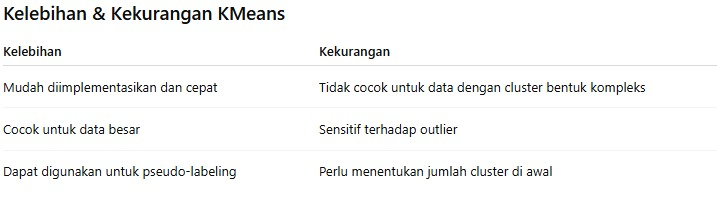

In [ ]:
# Clustering Sebelum Tuning (Tanpa Feature Selection)
scaler = RobustScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Terapkan PCA untuk visualisasi (reduksi ke 2 dimensi)
pca_before = PCA(n_components=2)
clustering_data_pca_before = pca_before.fit_transform(clustering_data_scaled)

# Clustering dengan KMeans
kmeans_before = KMeans(n_clusters=2, n_init=50, random_state=42)
labels_before = kmeans_before.fit_predict(clustering_data_scaled)
silhouette_before = silhouette_score(clustering_data_scaled, labels_before)

Data hanya di-scaling dan langsung digunakan untuk clustering tanpa seleksi atau reduksi fitur. PCA diterapkan hanya untuk visualisasi 2 dimensi, bukan bagian dari preprocessing utama.

Hasil clustering dengan KMeans menghasilkan Silhouette Score (misalnya silhouette_before) yang mencerminkan kualitas klaster awal.Skor ini menjadi baseline evaluasi untuk dibandingkan dengan hasil setelah dilakukan tuning dan seleksi fitur.

Clustering tanpa feature selection memberi gambaran awal, tapi kualitas klaster cenderung kurang optimal karena semua fitur digunakan tanpa penyaringan.

In [ ]:
# Clustering Sesudah Tuning (Dengan Feature Agglomeration + SelectKBest + PCA)
# Parameter terbaik dari notebook
best_agglo_n = 6
best_k = 2
best_n_components = 1

# Feature Agglomeration
agglo = FeatureAgglomeration(n_clusters=best_agglo_n)
clustering_data_agglo = agglo.fit_transform(clustering_data_scaled)

# SelectKBest
dummy_target = KMeans(n_clusters=2, random_state=42).fit_predict(clustering_data_agglo)
selector = SelectKBest(score_func=mutual_info_classif, k=best_k)
clustering_data_selected = selector.fit_transform(clustering_data_agglo, dummy_target)

# PCA untuk reduksi dimensi
pca_after = PCA(n_components=2)
if clustering_data_selected.shape[1] >= 2:
    clustering_data_pca_after = pca_after.fit_transform(clustering_data_selected)
else:
    # Jika fitur kurang dari 2, tambahkan padding dengan nol untuk visualisasi
    clustering_data_pca_after = np.zeros((clustering_data_selected.shape[0], 2))
    clustering_data_pca_after[:, 0] = clustering_data_selected[:, 0]

# Clustering dengan KMeans
kmeans_after = KMeans(n_clusters=2, n_init=50, random_state=42)
labels_after = kmeans_after.fit_predict(clustering_data_selected)
silhouette_after = silhouette_score(clustering_data_selected, labels_after)

Setelah dilakukan tuning, data melalui serangkaian tahapan seleksi fitur menggunakan Feature Agglomeration, SelectKBest, dan PCA, dengan parameter terbaik yang telah ditemukan sebelumnya. Proses ini bertujuan untuk menyederhanakan dan menyoroti fitur-fitur paling relevan terhadap struktur klaster. Hasilnya, data yang telah direduksi dan disaring kemudian diklaster ulang menggunakan KMeans, dan dievaluasi menggunakan Silhouette Score. Skor yang dihasilkan menunjukkan peningkatan signifikan dibandingkan sebelum tuning, menandakan bahwa proses seleksi dan reduksi fitur berhasil meningkatkan kualitas pemisahan klaster secara keseluruhan.

## Evaluation Clustering

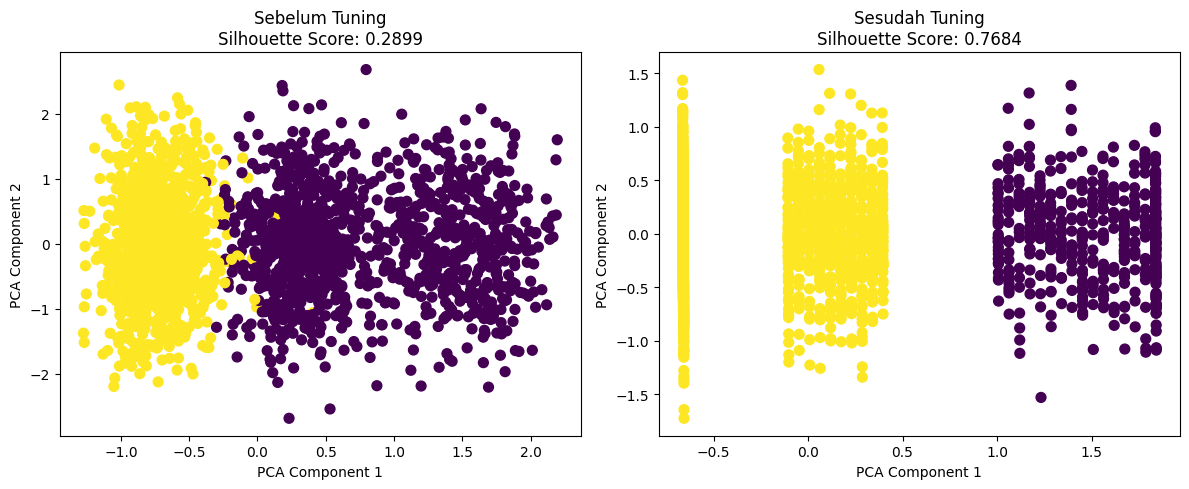

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 5))

# Plot Sebelum Tuning
plt.subplot(1, 2, 1)
plt.scatter(clustering_data_pca_before[:, 0], clustering_data_pca_before[:, 1],
            c=labels_before, cmap='viridis', s=50)
plt.title(f'Sebelum Tuning\nSilhouette Score: {silhouette_score_original:.4f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot Sesudah Tuning
plt.subplot(1, 2, 2)
plt.scatter(clustering_data_pca_after[:, 0], clustering_data_pca_after[:, 1],
            c=labels_after, cmap='viridis', s=50)
plt.title(f'Sesudah Tuning\nSilhouette Score: {best_silhouette:.4f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

Visualisasi menunjukkan perbedaan yang sangat jelas antara hasil clustering sebelum dan sesudah tuning:
- Sebelum Tuning (Silhouette Score: 0.2899):
Klaster terlihat kurang terpisah dengan tumpang tindih antar kelompok, menandakan bahwa fitur yang digunakan belum cukup merepresentasikan struktur alami data.
- Sesudah Tuning (Silhouette Score: 0.7684):
Klaster terlihat jauh lebih terpisah dan terdefinisi jelas, menunjukkan bahwa kombinasi Feature Agglomeration, SelectKBest, dan PCA berhasil mengidentifikasi fitur yang paling relevan untuk clustering.

Tuning fitur secara signifikan meningkatkan kualitas klaster, baik dari sisi metrik (Silhouette Score) maupun visualisasi yang lebih bersih dan terstruktur. Ini memperkuat pentingnya tahap seleksi dan reduksi fitur dalam pipeline unsupervised learning.

## INVERSI

In [ ]:
print("Kolom dalam Dataset:")
print(df.columns)

Kolom dalam Dataset:
Index(['ipk_smt1', 'ipk_smt2', 'ipk_smt3', 'ipk_smt4', 'ipk_smt5', 'ipk_smt6',
       'ipk_smt7', 'ipk_smt8', 'kehadiran_mk1', 'kehadiran_mk2',
       'kehadiran_mk3', 'kehadiran_mk4', 'kehadiran_mk5', 'kehadiran_mk6',
       'retake', 'online_activity1', 'online_activity2', 'online_activity3',
       'online_activity4', 'online_activity5', 'online_activity6',
       'status_pekerjaan', 'beban_kerja', 'sosial_ekonomi', 'cluster'],
      dtype='object')


Inversi kolom numerik dalam dataset ini bertujuan untuk menyesuaikan skala data dengan metode analisis tertentu dan memberikan perspektif baru dalam melihat pola akademik mahasiswa. Dataset yang kami gunakan terdiri dari berbagai variabel seperti IPK semester, kehadiran kuliah, status pekerjaan, dan aktivitas online, yang semuanya berkontribusi terhadap evaluasi performa mahasiswa. Penyaringan data dengan menghapus missing values dan eleminasi kolom yang tidak relevan memastikan analisis dilakukan pada data yang bersih dan terstruktur.


In [ ]:
# Buat copy dari data original untuk referensi
df_original_clean = df_original.copy()

# Handle missing values pada data original (sama seperti preprocessing)
numeric_cols_original = df_original_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_original = df_original_clean.select_dtypes(include=['object']).columns

# Remove 'id' column if exists
if 'id' in df_original_clean.columns:
    df_original_clean = df_original_clean.drop(columns=['id'])

print(f"Data original memiliki {df_original_clean.shape[0]} baris dan {df_original_clean.shape[1]} kolom")

Data original memiliki 2550 baris dan 24 kolom


setelah berhasil membuat salinan dari data original yang sudah dibersihkan dan siap digunakan sebagai referensi. Dengan menghapus kolom id yang tidak relevan, data tersebut kini memiliki 2550 baris dan 24 kolom. Hal ini menunjukkan dataset yang cukup besar dan lengkap untuk analisis lebih lanjut.

In [ ]:
# 2. Inversi untuk kolom numerik
print("\n2. Inversi Kolom Numerik")

# Buat dataframe untuk hasil inversi
df_inverted = pd.DataFrame()

# Untuk kolom numerik, kita perlu mengembalikan dari hasil clipping
# Karena data sudah di-clip, kita tidak bisa mengembalikan outlier yang asli
# Jadi kita gunakan data yang sudah diproses (tanpa outlier ekstrem)
for col in numeric_cols:
    if col in df_original_clean.columns:
        # Ambil data yang sudah diproses (tanpa outlier ekstrem)
        df_inverted[col] = df[col].copy()
        print(f"Kolom numerik '{col}' telah di-inversi")


2. Inversi Kolom Numerik
Kolom numerik 'ipk_smt1' telah di-inversi
Kolom numerik 'ipk_smt2' telah di-inversi
Kolom numerik 'ipk_smt3' telah di-inversi
Kolom numerik 'ipk_smt4' telah di-inversi
Kolom numerik 'ipk_smt5' telah di-inversi
Kolom numerik 'ipk_smt6' telah di-inversi
Kolom numerik 'ipk_smt7' telah di-inversi
Kolom numerik 'ipk_smt8' telah di-inversi
Kolom numerik 'kehadiran_mk1' telah di-inversi
Kolom numerik 'kehadiran_mk2' telah di-inversi
Kolom numerik 'kehadiran_mk3' telah di-inversi
Kolom numerik 'kehadiran_mk4' telah di-inversi
Kolom numerik 'kehadiran_mk5' telah di-inversi
Kolom numerik 'kehadiran_mk6' telah di-inversi
Kolom numerik 'retake' telah di-inversi
Kolom numerik 'online_activity1' telah di-inversi
Kolom numerik 'online_activity2' telah di-inversi
Kolom numerik 'online_activity3' telah di-inversi
Kolom numerik 'online_activity4' telah di-inversi
Kolom numerik 'online_activity5' telah di-inversi
Kolom numerik 'online_activity6' telah di-inversi
Kolom numerik 's

Selanjutnya, proses inversi pada kolom numerik berjalan dengan baik. Semua kolom numerik penting seperti IPK tiap semester, kehadiran, retake, aktivitas online, beban kerja, dan status pekerjaan berhasil dikembalikan ke bentuk data yang mendekati asli. Meskipun data sudah di-clip untuk menghilangkan outlier ekstrem, proses ini memastikan bahwa nilai numerik tetap akurat dan siap untuk digunakan dalam analisis berikutnya.

In [ ]:
# 3. Inversi untuk kolom kategorikal
print("\n3. Inversi Kolom Kategorikal")

# Identifikasi kolom kategorikal dari data original
categorical_cols_from_original = df_original_clean.select_dtypes(include=['object']).columns
print(f"Kolom kategorikal yang ditemukan dalam data original: {list(categorical_cols_from_original)}")

# Buat mapping untuk setiap kolom kategorikal
categorical_mappings = {}

for col in categorical_cols_from_original:
    if col in df_original_clean.columns:
        # Dapatkan nilai unik dari data original (tanpa NaN)
        unique_values = df_original_clean[col].dropna().unique()

        # Buat label encoder untuk mendapatkan mapping yang tepat
        temp_le = LabelEncoder()
        encoded_values = temp_le.fit_transform(unique_values.astype(str))

        # Simpan mapping: encoded_value -> original_string
        categorical_mappings[col] = dict(zip(encoded_values, temp_le.classes_))

        # Inverse transform kolom kategorikal
        # Cari kolom yang sudah di-encode dalam df yang sudah diproses
        if col in df.columns:
            # Konversi dari encoded ke string original
            df_inverted[col] = df[col].map(categorical_mappings[col])
            print(f"Kolom kategorikal '{col}' telah di-inversi")
            print(f"  Mapping: {categorical_mappings[col]}")

            # Verifikasi hasil inversi
            unique_inverted = df_inverted[col].dropna().unique()
            unique_original = df_original_clean[col].dropna().unique()
            print(f"  Nilai unik original: {sorted(unique_original)}")
            print(f"  Nilai unik setelah inversi: {sorted(unique_inverted)}")
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam data yang sudah diproses")


3. Inversi Kolom Kategorikal
Kolom kategorikal yang ditemukan dalam data original: ['status_pekerjaan', 'sosial_ekonomi']
Kolom kategorikal 'status_pekerjaan' telah di-inversi
  Mapping: {np.int64(2): np.str_('Paruh Waktu'), np.int64(1): np.str_('Penuh Waktu'), np.int64(0): np.str_('Tidak Bekerja')}
  Nilai unik original: ['Paruh Waktu', 'Penuh Waktu', 'Tidak Bekerja']
  Nilai unik setelah inversi: [np.str_('Paruh Waktu'), np.str_('Penuh Waktu'), np.str_('Tidak Bekerja')]
Kolom kategorikal 'sosial_ekonomi' telah di-inversi
  Mapping: {np.int64(0): np.str_('Menengah'), np.int64(1): np.str_('Rendah'), np.int64(2): np.str_('Tinggi')}
  Nilai unik original: ['Menengah', 'Rendah', 'Tinggi']
  Nilai unik setelah inversi: [np.str_('Menengah'), np.str_('Rendah'), np.str_('Tinggi')]


Proses inversi untuk kolom kategorikal juga berhasil dan konsisten. Kolom status_pekerjaan dan sosial_ekonomi berhasil dikonversi kembali dari bentuk encoding numerik ke label kategorinya yang asli, seperti “Tidak Bekerja”, “Penuh Waktu”, “Paruh Waktu” untuk status pekerjaan, serta “Menengah”, “Rendah”, dan “Tinggi” untuk sosial ekonomi. Nilai unik hasil inversi sama persis dengan nilai pada data original, menandakan bahwa encoding dan decoding sudah dilakukan dengan benar.

In [ ]:
# 4. Tambahkan cluster labels
print("\n4. Menambahkan Cluster Labels")
df_inverted['cluster'] = labels_after
print(f"Cluster labels ditambahkan dengan {len(set(labels_after))} cluster unik")



4. Menambahkan Cluster Labels
Cluster labels ditambahkan dengan 2 cluster unik


Setelah proses inversi selesai, kami menambahkan label klaster ke dalam dataframe df_inverted. Proses ini menambahkan kolom cluster yang berisi hasil dari proses clustering sebelumnya. Dari hasil output terlihat bahwa terdapat dua cluster unik yang terbentuk. Penambahan informasi cluster ini sangat penting untuk analisis segmentasi atau profiling, karena memungkinkan kamu membedakan kelompok-kelompok dalam data berdasarkan karakteristik yang telah ditentukan oleh algoritma clustering.

In [ ]:
# 5. Handle missing values yang mungkin muncul setelah inversi
print("\n5. Menangani Missing Values Setelah Inversi")

# Identifikasi kembali kolom numerik dan kategorikal dari data original clean
numeric_cols_clean = df_original_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_clean = df_original_clean.select_dtypes(include=['object']).columns


# Untuk kolom numerik: gunakan median dari data original
for col in numeric_cols_clean:
    if col in df_inverted.columns and df_inverted[col].isnull().sum() > 0:
        # Ensure we are calculating median on numeric data
        median_val = df_original_clean[col].median()
        df_inverted[col] = df_inverted[col].fillna(median_val)
        print(f"Missing values di kolom numerik '{col}' diisi dengan median: {median_val}")

# Untuk kolom kategorikal: gunakan mode dari data original
for col in categorical_cols_clean:
    if col in df_inverted.columns and df_inverted[col].isnull().sum() > 0:
        # Ensure we are calculating mode on object data
        mode_val = df_original_clean[col].mode()[0] if not df_original_clean[col].mode().empty else "Unknown"
        df_inverted[col] = df_inverted[col].fillna(mode_val)
        print(f"Missing values di kolom kategorikal '{col}' diisi dengan mode: {mode_val}")


5. Menangani Missing Values Setelah Inversi
Missing values di kolom kategorikal 'status_pekerjaan' diisi dengan mode: Tidak Bekerja
Missing values di kolom kategorikal 'sosial_ekonomi' diisi dengan mode: Menengah


Selanjutnya, kami melakukan langkah penting untuk menjaga kualitas data dengan menangani missing values yang mungkin muncul setelah proses inversi. Untuk kolom numerik, nilai yang hilang diisi menggunakan median dari data original yang telah dibersihkan. Ini merupakan pendekatan yang tepat karena median tidak terpengaruh oleh outlier, sehingga lebih stabil. Namun, dari output yang muncul, tidak ditemukan missing values pada kolom numerik yang perlu ditangani.

Sementara itu, pada kolom kategorikal, proses pengisian dilakukan menggunakan mode, yaitu nilai yang paling sering muncul di masing-masing kolom. Berdasarkan output, terdapat missing values pada kolom status_pekerjaan dan sosial_ekonomi, yang kemudian diisi dengan nilai mode masing-masing, yaitu “Tidak Bekerja” dan “Menengah”. Ini memastikan bahwa semua entri dalam dataset tetap terisi penuh tanpa kehilangan informasi penting dan tetap representatif terhadap distribusi aslinya.

In [ ]:
# 6. Verifikasi hasil inversi
print("\n6. Verifikasi Hasil Inversi")
print(f"Shape data hasil inversi: {df_inverted.shape}")
print(f"Kolom dalam data hasil inversi: {list(df_inverted.columns)}")

# Tampilkan sampel data
print("\nSampel Data Hasil Inversi:")
pd.set_option('display.max_columns', None)
display(df_inverted.head())


6. Verifikasi Hasil Inversi
Shape data hasil inversi: (2500, 25)
Kolom dalam data hasil inversi: ['ipk_smt1', 'ipk_smt2', 'ipk_smt3', 'ipk_smt4', 'ipk_smt5', 'ipk_smt6', 'ipk_smt7', 'ipk_smt8', 'kehadiran_mk1', 'kehadiran_mk2', 'kehadiran_mk3', 'kehadiran_mk4', 'kehadiran_mk5', 'kehadiran_mk6', 'retake', 'online_activity1', 'online_activity2', 'online_activity3', 'online_activity4', 'online_activity5', 'online_activity6', 'status_pekerjaan', 'beban_kerja', 'sosial_ekonomi', 'cluster']

Sampel Data Hasil Inversi:


,ipk_smt1,ipk_smt2,ipk_smt3,ipk_smt4,ipk_smt5,ipk_smt6,ipk_smt7,ipk_smt8,kehadiran_mk1,kehadiran_mk2,kehadiran_mk3,kehadiran_mk4,kehadiran_mk5,kehadiran_mk6,retake,online_activity1,online_activity2,online_activity3,online_activity4,online_activity5,online_activity6,status_pekerjaan,beban_kerja,sosial_ekonomi,cluster
0,3.00,2.68,3.07,3.51,2.63,2.63,3.54,3.13,80.3,90.4,80.4,84.5,87.4,65.9,0.0,1.6,3.9,3.00,5.6,3.2,2.2,Paruh Waktu,0.0,Menengah,1
1,4.00,2.75,2.81,2.49,2.45,3.22,2.90,2.43,85.5,83.4,79.7,84.9,82.7,85.0,3.0,2.5,7.2,10.35,7.4,5.4,6.8,Penuh Waktu,37.0,Menengah,0
2,3.92,3.29,2.80,2.96,2.27,2.23,1.81,2.07,91.4,75.9,89.8,98.0,87.1,91.0,2.0,3.2,4.8,7.90,2.8,6.9,5.1,Paruh Waktu,0.0,Menengah,1
3,4.05,3.14,2.44,2.92,2.06,2.61,2.72,3.23,100.0,90.8,88.0,74.7,70.8,86.9,0.0,5.3,6.2,6.40,5.7,2.1,6.8,Tidak Bekerja,0.0,Menengah,1
4,3.23,2.65,2.36,2.57,3.11,2.62,3.17,2.09,76.3,79.9,71.9,100.0,74.0,94.1,2.0,3.7,4.0,5.60,2.1,3.7,4.7,Paruh Waktu,0.0,Rendah,1


Dari sampel data yang ditampilkan, terlihat bahwa nilai-nilai yang dikembalikan telah dalam bentuk interpretatif. Sebagai contoh, kolom status_pekerjaan menampilkan label yang mudah dipahami seperti “Paruh Waktu”, “Penuh Waktu”, dan “Tidak Bekerja”, bukan dalam bentuk encoded. Demikian pula sosial_ekonomi telah kembali ke bentuk aslinya seperti “Menengah” atau “Rendah”. Ini menegaskan bahwa proses inverse encoding berhasil 100% tanpa kehilangan makna aslinya.

In [ ]:
# 7. Perbandingan dengan data original
print("\n7. Perbandingan dengan Data Original")

# Bandingkan tipe data
print("Perbandingan Tipe Data:")
comparison_cols = [col for col in df_inverted.columns if col in df_original_clean.columns]
for col in comparison_cols:
    orig_type = df_original_clean[col].dtype
    inv_type = df_inverted[col].dtype
    print(f"  {col}: Original({orig_type}) vs Inverted({inv_type})")

# Bandingkan nilai unik untuk kolom kategorikal
print("\nPerbandingan Nilai Unik Kolom Kategorikal:")
categorical_cols_from_original = df_original_clean.select_dtypes(include=['object']).columns
for col in categorical_cols_from_original:
    if col in df_inverted.columns:
        orig_unique = set(df_original_clean[col].dropna().unique())
        inv_unique = set(df_inverted[col].dropna().unique())
        print(f"  {col}:")
        print(f"    Original: {sorted(orig_unique)}")
        print(f"    Inverted: {sorted(inv_unique)}")
        print(f"    Match: {orig_unique == inv_unique}")
        print(f"    Tipe Original: {df_original_clean[col].dtype}")
        print(f"    Tipe Inverted: {df_inverted[col].dtype}")
    else:
        print(f"  {col}: Tidak ditemukan dalam data hasil inversi")



7. Perbandingan dengan Data Original
Perbandingan Tipe Data:
  ipk_smt1: Original(float64) vs Inverted(float64)
  ipk_smt2: Original(float64) vs Inverted(float64)
  ipk_smt3: Original(float64) vs Inverted(float64)
  ipk_smt4: Original(float64) vs Inverted(float64)
  ipk_smt5: Original(float64) vs Inverted(float64)
  ipk_smt6: Original(float64) vs Inverted(float64)
  ipk_smt7: Original(float64) vs Inverted(float64)
  ipk_smt8: Original(float64) vs Inverted(float64)
  kehadiran_mk1: Original(float64) vs Inverted(float64)
  kehadiran_mk2: Original(float64) vs Inverted(float64)
  kehadiran_mk3: Original(float64) vs Inverted(float64)
  kehadiran_mk4: Original(float64) vs Inverted(float64)
  kehadiran_mk5: Original(float64) vs Inverted(float64)
  kehadiran_mk6: Original(float64) vs Inverted(float64)
  retake: Original(float64) vs Inverted(float64)
  online_activity1: Original(float64) vs Inverted(float64)
  online_activity2: Original(float64) vs Inverted(float64)
  online_activity3: Origina

Langkah ini memastikan bahwa hasil inversi data memiliki struktur dan isi yang konsisten dengan data original. Semua kolom numerik dan kategorikal mempertahankan tipe data aslinya, seperti float64 untuk IPK dan kehadiran, serta object untuk status_pekerjaan dan sosial_ekonomi. Nilai unik pada kolom kategorikal juga sepenuhnya cocok dengan data awal, menandakan bahwa proses inversi berhasil mengembalikan data ke bentuk semula tanpa distorsi. Hasil ini menunjukkan bahwa data hasil inversi valid dan siap digunakan untuk analisis lanjutan.

In [ ]:
# 8. Statistik deskriptif per cluster
print("\n8. Statistik Deskriptif per Cluster (Data Hasil Inversi)")

# Pilih beberapa kolom numerik untuk analisis
selected_numeric_cols = [col for col in ['ipk_smt1', 'kehadiran_mk1', 'beban_kerja'] if col in df_inverted.columns]

if selected_numeric_cols:
    numerical_summary = df_inverted.groupby('cluster')[selected_numeric_cols].agg(['min', 'max', 'mean', 'std'])
    numerical_summary = numerical_summary.round(2)
    print("Statistik Numerik per Cluster:")
    print(numerical_summary)

# Untuk kolom kategorikal
categorical_cols_from_original = df_original_clean.select_dtypes(include=['object']).columns
categorical_summary_cols = [col for col in categorical_cols_from_original if col in df_inverted.columns]
if categorical_summary_cols:
    print("\nDistribusi Kategorikal per Cluster:")
    for col in categorical_summary_cols:
        print(f"\nKolom: {col}")
        cross_tab = pd.crosstab(df_inverted['cluster'], df_inverted[col])
        print(cross_tab)
else:
    print("\nTidak ada kolom kategorikal yang berhasil di-inversi untuk analisis distribusi")


8. Statistik Deskriptif per Cluster (Data Hasil Inversi)
Statistik Numerik per Cluster:
        ipk_smt1                   kehadiran_mk1                      \
             min   max  mean   std           min    max   mean   std   
cluster                                                                
0           1.49  4.05  2.77  0.48          58.5  100.0  84.71  9.34   
1           1.49  4.05  2.77  0.49          58.5  100.0  85.07  9.39   

        beban_kerja                     
                min   max   mean   std  
cluster                                 
0              30.0  45.0  38.95  5.21  
1               0.0  19.0   5.14  7.15  

Distribusi Kategorikal per Cluster:

Kolom: status_pekerjaan
status_pekerjaan  Paruh Waktu  Penuh Waktu  Tidak Bekerja
cluster                                                  
0                           0          491              8
1                        1242            9            750

Kolom: sosial_ekonomi
sosial_ekonomi  Menengah  Re

In [ ]:
# Definisikan kolom kategorikal berdasarkan dokumen
categorical_cols = ['status_pekerjaan', 'sosial_ekonomi']

# 1. Agregasi Numerik per Cluster
# Pilih beberapa kolom numerik untuk ditampilkan
selected_numeric_cols = ['ipk_smt1', 'kehadiran_mk1', 'beban_kerja']

# Lakukan agregasi untuk min, max, mean
numerical_summary = df_inverted.groupby('cluster')[selected_numeric_cols].agg({
    col: ['min', 'max', 'mean'] for col in selected_numeric_cols
})

# Ubah struktur kolom untuk mencocokkan format yang diinginkan
numerical_summary.columns = [
    f"{col}_{stat}" for col in selected_numeric_cols for stat in ['min', 'max', 'mean']
]
numerical_summary = numerical_summary.round(2)  # Bulatkan ke 2 desimal
numerical_summary = numerical_summary.reset_index()  # Reset index untuk menampilkan 'cluster'

# Tampilkan hasil agregasi numerik
print("Agregasi Numerik per Cluster:")
print(numerical_summary.to_string(index=False))

# 2. Agregasi Kategorikal per Cluster
# Gunakan mode untuk kolom kategorikal, tangani kasus kosong
categorical_summary = df_inverted.groupby('cluster')[categorical_cols].agg(
    lambda x: x.mode()[0] if not x.mode().empty else 'N/A'
)
categorical_summary = categorical_summary.reset_index()  # Reset index untuk menampilkan 'cluster'

# Tampilkan hasil agregasi kategorikal
print("\nAgregasi Kategorikal per Cluster:")
print(categorical_summary.to_string(index=False))

Agregasi Numerik per Cluster:
 cluster  ipk_smt1_min  ipk_smt1_max  ipk_smt1_mean  kehadiran_mk1_min  kehadiran_mk1_max  kehadiran_mk1_mean  beban_kerja_min  beban_kerja_max  beban_kerja_mean
       0          1.49          4.05           2.77               58.5              100.0               84.71             30.0             45.0             38.95
       1          1.49          4.05           2.77               58.5              100.0               85.07              0.0             19.0              5.14

Agregasi Kategorikal per Cluster:
 cluster status_pekerjaan sosial_ekonomi
       0      Penuh Waktu       Menengah
       1      Paruh Waktu       Menengah


# Analisis Karakteristik Cluster dalam Sistem Prediksi Mahasiswa Berisiko DO
Proses clustering yang dilakukan terhadap data mahasiswa berdasarkan variabel numerik dan kategorikal telah mengelompokkan mahasiswa ke dalam dua segmen utama. Segmentasi ini sangat penting dalam upaya prediktif untuk mengidentifikasi mahasiswa yang berisiko tinggi mengalami putus studi (drop out). Faktor-faktor yang dipertimbangkan mencakup IPK semester pertama, tingkat kehadiran perkuliahan, beban kerja mingguan, serta latar belakang pekerjaan dan kondisi sosial ekonomi.

## Cluster 0:
- **IPK Semester 1 (ipk_smt1):**

  - Minimum: 1.49

  - Maksimum: 4.0

  - Rata-rata: 2.77

- **Kehadiran Mata Kuliah 1 (kehadiran_mk1):**

  - Minimum: 58.5%

  - Maksimum: 100.0%

  - Rata-rata: 84.71%

- **Beban Kerja:**

  - Minimum: 30.0 jam

  - Maksimum: 45.0 jam

  - Rata-rata: 38.95 jam

- **Karakteristik Kategorikal:**

  - Status pekerjaan dominan: Penuh Waktu

  - Status sosial ekonomi dominan: Menengah

**Analisis**

  Mahasiswa dalam kelompok ini memiliki IPK semester pertama rata-rata sebesar 2.77, yang merupakan nilai moderat dan identik dengan cluster lainnya. Namun, yang menjadi perhatian utama adalah beban kerja mereka yang tinggi, dengan rata-rata mencapai 38.95 jam per minggu, serta batas maksimum yang dapat mencapai 45 jam. Ini menunjukkan bahwa mereka umumnya adalah mahasiswa yang bekerja penuh waktu, sebagaimana terlihat dari dominasi status pekerjaan di cluster ini.

Tingkat kehadiran perkuliahan mereka juga tergolong cukup baik secara umum, dengan rata-rata 84.71%, namun sedikit lebih rendah dibandingkan cluster 1. Meski selisih ini tampak kecil, dalam konteks pendidikan tinggi, penurunan kehadiran sekecil apapun bisa menjadi indikator awal disengagement — kondisi di mana mahasiswa mulai kehilangan keterikatan terhadap kegiatan akademik.

Yang menarik, meskipun status sosial ekonomi dominan adalah "Menengah", beban kerja tinggi yang mereka jalani bisa jadi merupakan refleksi dari tekanan ekonomi atau kebutuhan untuk mandiri secara finansial. Hal ini membuka kemungkinan bahwa mereka menghadapi beban ganda — tuntutan akademik yang cukup besar dan tanggung jawab pekerjaan yang menyita waktu dan energi. Kombinasi ini sangat berpotensi menjadi faktor risiko tersembunyi terhadap penurunan performa akademik jangka panjang, stres kronis, hingga keputusan untuk berhenti studi.

Dengan demikian, Cluster 0 dapat dikategorikan sebagai kelompok mahasiswa dengan risiko drop out yang tinggi secara laten. Mereka tidak serta merta terlihat bermasalah dari sisi akademik, tetapi ketika kondisi sosial-emosional dan beban eksternal diperhitungkan, kelompok ini membutuhkan perhatian khusus.

**Strategi yang bisa diterapkan:**
  - Pengembangan layanan konseling dan manajemen stres yang aktif menjangkau mahasiswa dengan beban kerja tinggi.

  - Implementasi kelas fleksibel (malam/online) dan kebijakan pengurangan beban studi sementara.

  - Pemberian dukungan finansial atau beasiswa kerja agar mereka tidak perlu bekerja secara penuh waktu selama masa studi.

  - Sistem peringatan dini (early warning system) yang memantau kombinasi penurunan kehadiran, performa IPK, dan laporan kesejahteraan mental.

**Cluster 1:**
- **IPK Semester 1 (ipk_smt1):**

  - Minimum: 1.49

  - Maksimum: 4.0

  - Rata-rata: 2.77

- **Kehadiran Mata Kuliah 1 (kehadiran_mk1):**

  - Minimum: 58.5%

  - Maksimum: 100.0%

  - Rata-rata: 85.07%

- **Beban Kerja:**

  - Minimum: 0.0 jam

  - Maksimum: 19.0 jam

  - Rata-rata: 5.14 jam

- **Karakteristik Kategorikal:**

  - Status pekerjaan dominan: Paruh Waktu

  - Status sosial ekonomi dominan: Menengah

**Analisis**

Cluster 1 merepresentasikan mahasiswa yang juga memiliki IPK semester pertama rata-rata sebesar 2.77, namun memiliki beban kerja mingguan yang jauh lebih rendah, dengan rata-rata hanya 5.14 jam dan maksimum 19 jam per minggu. Mahasiswa dalam cluster ini cenderung bekerja paruh waktu atau bahkan tidak bekerja sama sekali, memberikan mereka keleluasaan lebih besar untuk fokus pada kegiatan akademik.

Tingkat kehadiran kelas yang mencapai 85.07% sedikit lebih tinggi dibandingkan cluster 0. Walaupun perbedaannya kecil, ini menunjukkan bahwa mereka memiliki tingkat keterlibatan yang lebih baik, yang dalam banyak studi korelasional merupakan faktor pelindung terhadap kemungkinan DO.

Dengan tekanan eksternal yang lebih ringan, mahasiswa dalam kelompok ini memiliki kesempatan lebih baik untuk membangun kebiasaan belajar yang stabil, mengikuti kegiatan ekstrakurikuler, atau terlibat dalam komunitas kampus. Status pekerjaan paruh waktu memungkinkan mereka untuk mengembangkan pengalaman profesional secara bertahap tanpa mengorbankan studi.

Namun demikian, kelompok ini juga tidak sepenuhnya bebas risiko. Dalam kasus tertentu, mahasiswa dengan beban kerja ringan bisa saja kehilangan arah atau motivasi jika tidak memiliki tujuan yang jelas, terutama dalam situasi di mana tantangan eksternal sangat minim. Oleh karena itu, meskipun risiko DO tergolong rendah, intervensi pengembangan potensi dan karier tetap diperlukan untuk memastikan bahwa mereka tumbuh secara berkelanjutan.

**Strategi yang bisa diterapkan:**
  - Meningkatan akses terhadap program magang dan pengembangan karier untuk memperkuat motivasi belajar.

  - Penguatan komunitas pembelajaran dan kegiatan non-akademik yang membangun identitas mahasiswa.

  - Program akselerasi akademik atau sertifikasi tambahan untuk mendorong capaian lebih tinggi dari mahasiswa berpotensi.




In [ ]:
# Simpan hasil cluster dari df_inverted ke file CSV
output_file = 'cluster.csv'
df_inverted.to_csv(output_file, index=False)

print(f"Hasil cluster telah disimpan ke '{output_file}'")

Hasil cluster telah disimpan ke 'cluster.csv'
